In [ ]:
#讀取資料檔案
import pandas as pd
import matplotlib.pyplot as plt 
from google.colab import files
df1=pd.read_excel('loan3(na).xlsx')
df2=pd.read_excel('nba2.xlsx')

# 資料內容顯示

In [ ]:
#顯示資料內容前五列
df1.head()

,loan,Industry_type,Company_type,Beginning_time,Collateral,Bank_relationship,Capital_increase,Age,Education,Credit
0,1.0,1,1.0,4,4,1,4,3,2,2
1,1.0,2,1.0,2,3,2,3,4,3,2
2,1.0,1,1.0,3,3,1,4,3,4,1
3,1.0,2,1.0,4,1,1,4,3,4,2
4,1.0,1,1.0,3,1,1,3,2,3,2


# 卡方檢定與交叉表：兩類別資料之資料分析方法

In [ ]:
#交叉表:兩個變項間的分佈狀況
#產業型態(Industry_type)VS 貸款違約與否(loan)的分佈狀況
#語法:pd.crosstab(index,columns,margins=True)，margins=True表顯示all，False或不命令margins則不顯示
loan_data=pd.crosstab(df1['Industry_type'],df1['loan'])
loan_data

loan,1.0,2.0
Industry_type,,
1,77,10
2,76,42


In [ ]:
#交叉表:兩個變項間的分佈狀況
#產業型態(Industry_type)VS 貸款違約與否(loan)的分佈狀況
#語法:以normalize=0以百分比方式分析不同產業別貸款違約之差異
pd.crosstab(df1['Industry_type'],df1['loan'],margins=False,normalize=0)

loan,1.0,2.0
Industry_type,,
1,0.885057,0.114943
2,0.644068,0.355932


In [ ]:
#匯入scipy.stats模組
#卡方檢定依序顯示卡方值、P值、自由度、與原數據同維度的對應期望值
import scipy.stats as stats
Chi_Square=stats.chi2_contingency(loan_data)
print("Chi-Square value=%.3f,   p_value=%.3f"%Chi_Square[0:2])

Chi-Square value=14.116,   p_value=0.000


卡方值大且P<=0.05 代表有顯著差異 拒絕H0

# 練習一：
1.請利用交叉分析與卡方檢定分析主客場(H/R)在勝負(W/L)比例之差異。(亦即主客場是否顯著影響勝負？)

2.請畫出主客場勝場數與敗場數之集群長條圖

In [ ]:
df2.head()

,DATASET,R/P,DATE,TEAMS,H/R,W/E,W/L,DIFF,1Q,2Q,...,TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,OPENING ODDS,SPREAD
0,2016-2017 Regular Season,1,10/25/2016,New York,2,1,0,-29,18,27,...,18,6,88,100.4,100.4,87.7,116.6,3,205.5,9.5
1,2016-2017 Regular Season,1,10/25/2016,Cleveland,1,1,1,29,28,20,...,14,5,117,100.4,100.4,116.6,87.7,3,-9.5,-9.5
2,2016-2017 Regular Season,1,10/25/2016,Utah,2,2,0,-9,26,20,...,11,5,104,92.5,92.5,112.4,122.1,3,194.0,6.0
3,2016-2017 Regular Season,1,10/25/2016,Portland,1,2,1,9,26,28,...,12,3,113,92.5,92.5,122.1,112.4,3,-6.0,-6.0
4,2016-2017 Regular Season,1,10/25/2016,San Antonio,2,2,1,29,31,33,...,13,3,129,98.8,98.8,130.6,101.2,3,210.5,8.0


第一題

請利用交叉分析與卡方檢定分析主客場(H/R)在勝負(W/L)比例之差異。(亦即主客場是否顯著影響勝負？)

In [ ]:
a=pd.crosstab(df2['H/R'],df2['W/L'],margins=False,normalize=0)
a

W/L,0,1
H/R,,
1,0.416,0.584
2,0.584,0.416


如果主場則贏的比率是0.58374，輸的比率是0.41626，客場則相反

In [ ]:
Chi_Square=stats.chi2_contingency(pd.crosstab(df2['H/R'],df2['W/L']))
print("Chi-Square value=%.3f,   p_value=%.3f"%Chi_Square[0:2])

Chi-Square value=68.333,   p_value=0.000


P值=0<=0.05，所以主客場顯著影響勝負

第二題

請畫出主客場勝場數與敗場數之集群長條圖

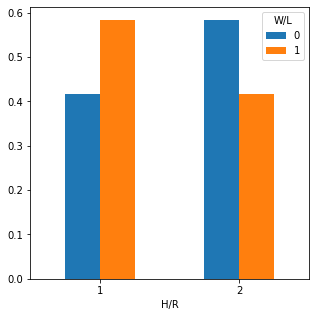

In [ ]:
a.plot.bar(rot=0)

# 相關分析:用於分析兩變數是否有顯著相關(量*量)

In [ ]:
df2.head()

,DATASET,R/P,DATE,TEAMS,H/R,W/E,W/L,DIFF,1Q,2Q,...,TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,OPENING ODDS,SPREAD
0,2016-2017 Regular Season,1,10/25/2016,New York,2,1,0,-29,18,27,...,18,6,88,100.4,100.4,87.7,116.6,3,205.5,9.5
1,2016-2017 Regular Season,1,10/25/2016,Cleveland,1,1,1,29,28,20,...,14,5,117,100.4,100.4,116.6,87.7,3,-9.5,-9.5
2,2016-2017 Regular Season,1,10/25/2016,Utah,2,2,0,-9,26,20,...,11,5,104,92.5,92.5,112.4,122.1,3,194.0,6.0
3,2016-2017 Regular Season,1,10/25/2016,Portland,1,2,1,9,26,28,...,12,3,113,92.5,92.5,122.1,112.4,3,-6.0,-6.0
4,2016-2017 Regular Season,1,10/25/2016,San Antonio,2,2,1,29,31,33,...,13,3,129,98.8,98.8,130.6,101.2,3,210.5,8.0


In [ ]:
#量的資料, 設定NBA_set為欲分析變數之集合
NBA_set=['3P', '3PA', 'FT', 'FTA',
       'OR', 'TOT','A', 'PF', 'ST', 'TO','PTS']

In [ ]:
#相關性corr相關分析的語法
#計算DataFrame中所有列之間的相關係數
NBA_corr=df2[NBA_set].corr()
corr_result=pd.DataFrame(NBA_corr['PTS'])
corr_result

,PTS
3P,0.510425
3PA,0.237998
FT,0.352147
FTA,0.307191
OR,0.002235
TOT,0.099088
A,0.577553
PF,0.142519
ST,0.112034
TO,-0.106452


In [ ]:
#皮爾森相關分析(量*量), 進一步分析檢定相關程度是否具顯著性
from scipy import stats
name=[]
alist=[]
pvlist=[]
for i in range(len(NBA_set)):
  #取qu變數與PTS做皮爾森相關分析，a為相關係數，pv為P值
  (r,pvalue)=stats.pearsonr(df2['PTS'],df2[NBA_set[i]]) 
  name.append(NBA_set[i])
  alist.append(r)
  pvlist.append(pvalue)

In [ ]:
#display.float_format:接受浮點數並具有格式的字串，bug修復顯示格式以避免運行時錯誤
#lambda:定義函式，執行運算式時將會產生函式物件
#取3位小數點
pd.set_option('display.float_format',lambda x:'%.3f'%x)
#資料結構以DataFrame顯示 
#語法:pd.DataFrame(資料,index名稱,columns名稱)
result=pd.DataFrame(alist,name,columns=['Correlation'])
#將pvlist加進result第二欄
result.insert(1,'p_value',pvlist) 
result

,Correlation,p_value
3P,0.510,0.000
3PA,0.238,0.000
FT,0.352,0.000
FTA,0.307,0.000
OR,0.002,0.912
TOT,0.099,0.000
A,0.578,0.000
PF,0.143,0.000
ST,0.112,0.000
TO,-0.106,0.000


# 練習題二：請分析哪些因素(1Q,2Q,3Q,A,TO,ST,DR,OR)會顯著地影響到得分差(DIFF)，並說明你的分析結果。(請以視覺化圖形及檢定結果輔助說明之)

In [ ]:
NBA_set=['1Q','2Q','3Q','A','TO','ST','DR','OR']
from scipy import stats
name=[]
alist=[]
pvlist=[]
for i in range(len(NBA_set)):
  (r,pvalue)=stats.pearsonr(df2['DIFF'],df2[NBA_set[i]]) 
  name.append(NBA_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.3f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p_value',pvlist) 
result

,Correlation,p_value
1Q,0.325,0.000
2Q,0.304,0.000
3Q,0.337,0.000
A,0.411,0.000
TO,-0.127,0.000
ST,0.169,0.000
DR,0.430,0.000
OR,-0.029,0.150


1Q,2Q,3Q,A,TO,ST,DR的P值<0.05，可知他們對於DIFF有顯著相關性

1Q,2Q,3Q,A,TO,ST,DR的卡方值取絕對值大到小:DR>A>3Q>1Q>2Q>ST>TO，所以DR比其他的更有顯著性，TO的顯著性比其他小一點但仍有顯著性

OR的P值>0,05，所以可得和DIFF沒有顯著相關

In [ ]:
pairlist=['土地移轉總面積平方公尺','都市土地使用分區','交易筆棟數','建物型態','主要建材','建物現況格局-房','建物現況格局-廳','建物現況格局-隔間','有無管理組織','總價元','單價元平方公尺']
sns.heatmap(df2[pairlist].corr(),annot=True,cmap='Blues')

從散佈圖可以看出

# 作業：請依所提供的資料(2019STA.xlsx及2019STA2.xlsx)進行以下分析：
一、分析小考(Quiz)、期中考(Mid_Exam)、期末考(Final_Exam)成績之相關性。(請以視覺化圖形及檢定結果輔助說明之)

二、分析不同不同性別期末考成績及格比例之差異性。(請以圖表及檢定結果輔助說明之)